In [1]:
import pandas as pd
import numpy as np
import time
import os
import argparse
import gdreg
import matplotlib.pyplot as plt

# autoreload
%load_ext autoreload
%autoreload 2
%load_ext memory_profiler

In [2]:
JOB = "compute_ld"
PGEN_FILE = "/n/groups/price/martin/WES_analysis/toy_1K/chr@_v1.SPB.hg19.toy_1K"
PREFIX_OUT = "/n/groups/price/martin/WES_analysis/toy_1K/results/toy_1K"
RANDOM_SEED = 0
MEMORY = 32
SNP_RANGE = gdreg.util.parse_snp_range(
        'chr_tar=1|start_ind=0|end_ind=500|chr_ref=20,21'
    )

In [3]:
sys_start_time = time.time()

###########################################################################################
######                                    Parse Options                              ######
###########################################################################################

# JOB = args.job
# PGEN_FILE = args.pgen_file
# PREFIX_OUT = args.prefix_out
# MEMORY = args.memory
# RANDOM_SEED = args.random_seed
# SNP_RANGE = gdreg.util.parse_snp_range(args.snp_range)

# Check if the options are legal
LEGAL_JOB_LIST = [
    "compute_ld",
]
err_msg = "# run_gdreg: --job=%s not supported" % JOB
assert JOB in LEGAL_JOB_LIST, err_msg

if (SNP_RANGE is None) & (JOB in ["compute_ld"]):
    raise ValueError("# run_gdreg.py: --snp_range required for --job=%s" % JOB)

# Print input options
header = gdreg.util.get_cli_head()
header += "Call: run_simulation.py \\\n"
header += "--job %s\\\n" % JOB
header += "--pgen_file %s\\\n" % PGEN_FILE
header += "--memory %d\\\n" % MEMORY
header += "--random_seed %d\\\n" % RANDOM_SEED
header += "--snp_range %s\\\n" % ', '.join(['%s'%x for x in SNP_RANGE])
header += "--prefix_out %s\n" % PREFIX_OUT
print(header)

******************************************************************************
* Gene-level directional effect regression (GDReg)
* Version 0.0.2
* Martin Jinye Zhang
* HSPH / Broad Institute
* MIT License
******************************************************************************
Call: run_simulation.py \
--job compute_ld\
--pgen_file /n/groups/price/martin/WES_analysis/toy_1K/chr@_v1.SPB.hg19.toy_1K\
--memory 32\
--random_seed 0\
--snp_range 1, 0, 500, [20, 21]\
--prefix_out /n/groups/price/martin/WES_analysis/toy_1K/results/toy_1K



In [4]:
###########################################################################################
######                                   Data Loading                                ######
###########################################################################################
# Load genotype data
if JOB in ["compute_ld"]:
    print("# Loading --pgen_file")
    dic_data = {}
    for CHR in range(1, 23):
        if os.path.exists(PGEN_FILE.replace("@", "%s" % CHR) + ".pgen"):
            dic_data[CHR] = gdreg.util.read_pgen(PGEN_FILE.replace("@", "%s" % CHR))

    print("    Genotype data for %d CHRs:" % len(dic_data))
    for CHR in dic_data:
        n_sample = dic_data[CHR]["psam"].shape[0]
        n_snp = dic_data[CHR]["pvar"].shape[0]
        print("        CHR%2d (%d samples %d SNPs)" % (CHR, n_sample, n_snp))
    print("    " + gdreg.util.get_sys_info(sys_start_time))

# Loading --pgen_file
    Genotype data for 10 CHRs:
        CHR 1 (1000 samples 1400 SNPs)
        CHR 2 (1000 samples 1322 SNPs)
        CHR 3 (1000 samples 1326 SNPs)
        CHR 4 (1000 samples 1341 SNPs)
        CHR 5 (1000 samples 1311 SNPs)
        CHR 6 (1000 samples 1341 SNPs)
        CHR 7 (1000 samples 1375 SNPs)
        CHR 8 (1000 samples 1320 SNPs)
        CHR 9 (1000 samples 1307 SNPs)
        CHR10 (1000 samples 1280 SNPs)
    sys_time=0.2s, sys_mem=0.097GB


In [86]:
%%timeit
mat_ld = gdreg.score.compute_ld(dic_data, [1, 0, 1400], [1, 0, 1400], verbose=True)

# Call: gdreg.score.compute_ld
    1400 tar SNPs in CHR1, 1400 ref SNPs in CHR1, 1000 samples
    memory=128MB, block_size=50, n_block_tar=28, n_block_ref=28
    Completed, time=3.1s
# Call: gdreg.score.compute_ld
    1400 tar SNPs in CHR1, 1400 ref SNPs in CHR1, 1000 samples
    memory=128MB, block_size=50, n_block_tar=28, n_block_ref=28
    Completed, time=3.1s
# Call: gdreg.score.compute_ld
    1400 tar SNPs in CHR1, 1400 ref SNPs in CHR1, 1000 samples
    memory=128MB, block_size=50, n_block_tar=28, n_block_ref=28
    Completed, time=3.0s
# Call: gdreg.score.compute_ld
    1400 tar SNPs in CHR1, 1400 ref SNPs in CHR1, 1000 samples
    memory=128MB, block_size=50, n_block_tar=28, n_block_ref=28
    Completed, time=3.0s
# Call: gdreg.score.compute_ld
    1400 tar SNPs in CHR1, 1400 ref SNPs in CHR1, 1000 samples
    memory=128MB, block_size=50, n_block_tar=28, n_block_ref=28
    Completed, time=3.1s
# Call: gdreg.score.compute_ld
    1400 tar SNPs in CHR1, 1400 ref SNPs in CHR1, 1000

In [85]:
mat_ld = gdreg.score.compute_ld(dic_data, [1, 0, 1400], [1, 0, 1400], verbose=True)
mat_ld[:5, :5]

# Call: gdreg.score.compute_ld
    1400 tar SNPs in CHR1, 1400 ref SNPs in CHR1, 1000 samples
    memory=128MB, block_size=50, n_block_tar=28, n_block_ref=28
    Completed, time=3.0s


array([[ 1.5760448 ,  0.04794139,  0.01932031,  0.04350839, -0.04544937],
       [ 0.04794139,  1.0187789 ,  0.62208444,  0.29035023, -0.02933592],
       [ 0.01932031,  0.62208444,  0.98683363,  0.25520307, -0.13819256],
       [ 0.04350839,  0.29035023,  0.25520307,  0.9974274 , -0.03721449],
       [-0.04544937, -0.02933592, -0.13819256, -0.03721449,  0.9722339 ]],
      dtype=float32)

In [ ]:
%%timeit
mat_ld = gdreg.score.compute_ld(dic_data, [1, 0, 1400], [1, 0, 1400], verbose=True)

In [57]:
mat_ld = gdreg.score.compute_ld(dic_data, [1, 0, 1400], [1, 0, 1400], verbose=True)
mat_ld[:5, :5]

# Call: gdreg.score.compute_ld
    1400 tar SNPs in CHR1, 1400 ref SNPs in CHR1, 1000 samples
    memory=128MB, block_size=50, n_block_tar=28, n_block_ref=28
    Completed, time=3.1s


array([[ 1.5760448 ,  0.04794139,  0.01932031,  0.04350839, -0.04544937],
       [ 0.04794139,  1.0187789 ,  0.62208444,  0.29035023, -0.02933592],
       [ 0.01932031,  0.62208444,  0.98683363,  0.25520307, -0.13819256],
       [ 0.04350839,  0.29035023,  0.25520307,  0.9974274 , -0.03721449],
       [-0.04544937, -0.02933592, -0.13819256, -0.03721449,  0.9722339 ]],
      dtype=float32)

In [84]:
mat_ld_gold[:5, :5]

array([[ 1.5760485 ,  0.04794135,  0.01932021,  0.04350808, -0.04544919],
       [ 0.04794135,  1.018779  ,  0.6220863 ,  0.29035053, -0.02933584],
       [ 0.01932021,  0.6220863 ,  0.9868334 ,  0.25520343, -0.13819249],
       [ 0.04350808,  0.29035053,  0.25520343,  0.99742657, -0.0372147 ],
       [-0.04544919, -0.02933584, -0.13819249, -0.0372147 ,  0.9722307 ]],
      dtype=float32)

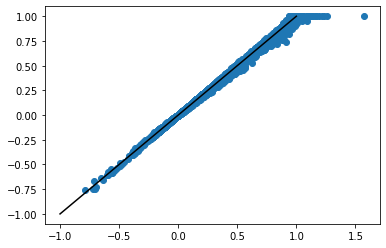

In [27]:
# Get gold standard
mat_X = gdreg.util.read_geno(dic_data[1]["pgen"], 0, 100)
mat_X = mat_X.T.astype(np.float32)
mat_X[mat_X == -9] = 0
v_maf = mat_X.mean(axis=0) * 0.5
mat_X = (mat_X - 2 * v_maf) / np.sqrt(2 * v_maf * (1 - v_maf))

mat_ld_gold = mat_X.T.dot(mat_X) / 1000
mat_cor_gold = np.corrcoef(mat_X.T)

plt.figure()
plt.scatter(mat_ld_gold[np.triu_indices(100, k=0)], mat_cor_gold[np.triu_indices(100, k=0)])
plt.plot([-1,1],[-1,1], color='k')
plt.show()

### Subroutine : dotprod_int8

In [36]:
n_sample = int(1e6)
mat_X = np.ones([n_sample, 10], dtype=np.int8)
mat_Y = np.ones([n_sample, 20], dtype=np.int8)

In [52]:
%%timeit
mat_dot = mat_X.astype(int).T.dot(mat_Y.astype(int))

288 ms ± 30.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [53]:
%%timeit
mat_prod = gdreg.score.dotprod_int8(mat_X.T, mat_Y)

73.1 ms ± 764 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [49]:
%mprun -f gdreg.score.dotprod_int8 gdreg.score.dotprod_int8(mat_X.T, mat_Y)

In [51]:
%mprun -f gdreg.score.dotprod_int8_baseline gdreg.score.dotprod_int8_baseline(mat_X, mat_Y)

In [39]:
mat_prod = gdreg.score.dotprod_int8(mat_X.T, mat_Y)

In [27]:
%%memit
mat_dot = mat_X.astype(int).T.dot(mat_Y.astype(int))

peak memory: 127.15 MiB, increment: 0.05 MiB


In [35]:
%mprun -f gdreg.score.dotprod_int8_baseline gdreg.score.dotprod_int8_baseline(mat_X, mat_Y)

In [30]:
%mprun -f gdreg.score.colsum_int8_baseline gdreg.score.colsum_int8_baseline(mat_X)

In [ ]:
%%timeit


# Baseline
# v_mean = mat_int8.sum(axis=0)
mat_dot = mat_X.astype(int).T.dot(mat_Y.astype(int))

# print(v_mean)
# print(mat_dot)

In [17]:
v_mean = gdreg.score.colsum_int8(mat_X)
v_mean

array([10000000, 10000000, 10000000, 10000000, 10000000, 10000000,
       10000000, 10000000, 10000000, 10000000])

In [21]:
%mprun -f gdreg.score.colsum_int8 gdreg.score.colsum_int8(mat_X)

In [23]:
%mprun -f gdreg.score.colsum_int8_baseline gdreg.score.colsum_int8_baseline(mat_X)

In [37]:
%%timeit
mat_dot = mat_X.astype(int).T.dot(mat_Y.astype(int))

238 ms ± 29.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%%timeit


# Baseline
v_mean = mat_int8.sum(axis=0)
mat_dot = mat_X.astype(int).T.dot(mat_Y.astype(int))

# Exp
v_mean = mat_int8.sum(axis=0)
mat_dot = mat_X.astype(int).T.dot(mat_Y.astype(int))


# print(v_mean)
# print(mat_dot)

24.3 ms ± 1.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [34]:
np.uint8

numpy.uint8

In [19]:
mat_dot

array([[-96, -96, -96, -96, -96, -96, -96, -96, -96, -96],
       [-96, -96, -96, -96, -96, -96, -96, -96, -96, -96],
       [-96, -96, -96, -96, -96, -96, -96, -96, -96, -96],
       [-96, -96, -96, -96, -96, -96, -96, -96, -96, -96],
       [-96, -96, -96, -96, -96, -96, -96, -96, -96, -96]], dtype=int8)